In [37]:
from utils import read_data 
import matplotlib.pyplot as plt
from transformers import PreTrainedTokenizerFast, AutoTokenizer
from itertools import islice
import torch
import pandas as pd

tokenizer = AutoTokenizer.from_pretrained("facebook/bart-base")


def print_statitiscs(articles, summaries, target='word_lengths'):

    if target == 'word_lengths':
        # article and summary word lengths 
        article_lengths = [len(article.split()) for article in articles]
        summary_lengths = [len(summary.split()) for summary in summaries]
    elif target == 'token_lengths':
        # article and summary subword lengths
        
        article_lengths = []
        summary_lengths = []
        for batch_articles, batch_summaries in generate_batch(articles, summaries, bsz=32):
            indexed_articles = tokenizer(batch_articles, return_tensors="pt", padding="longest" )['input_ids']
            indexed_summaries = tokenizer(batch_summaries, return_tensors="pt", padding="longest" )['input_ids']
            
            lengths = torch.sum(indexed_articles!=1, dim=-1) -2
            article_lengths.extend(lengths.tolist())

            lengths = torch.sum(indexed_summaries!=1, dim=-1) -2
            summary_lengths.extend(lengths.tolist())
    else:
        raise Exception('Cannot print statistics for ', target )
    fig, axes = plt.subplots(2, 1)
    axes[0].hist(article_lengths)
    axes[1].hist(summary_lengths)
    plt.show()
    
    print("The statistics of article length:", pd.Series(article_lengths).describe())
    print("The statistics of summary (reference) length:",  pd.Series(summary_lengths).describe())


def generate_batch(articles, summaries, bsz=32):
    
    summaries_iter = iter(summaries)
    articles_iter = iter(articles)

    while True:
        batch_summaries = list(islice(summaries_iter, bsz))
        batch_articles = list(islice(articles_iter, bsz))
        if len(batch_summaries) > 0:
            yield batch_articles, batch_summaries
        else: 
            break



Read data from :  task1/train/eLife_train.jsonl
The number of data:  4346


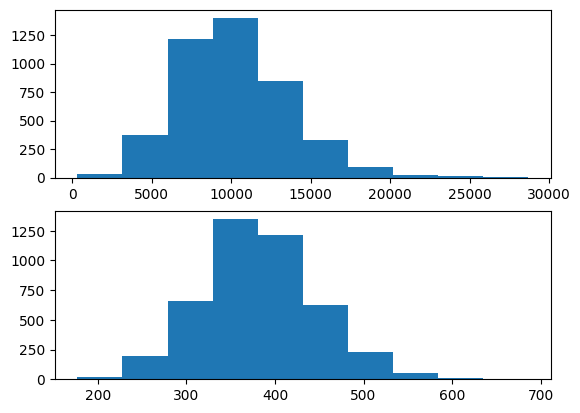

The statistics of article length: count     4346.000000
mean     10200.274045
std       3479.930206
min        324.000000
25%       7804.000000
50%       9890.000000
75%      12259.750000
max      28696.000000
dtype: float64
The statistics of summary (reference) length: count    4346.000000
mean      382.266222
std        64.334356
min       177.000000
25%       338.000000
50%       379.000000
75%       423.000000
max       686.000000
dtype: float64


Token indices sequence length is longer than the specified maximum sequence length for this model (21593 > 1024). Running this sequence through the model will result in indexing errors


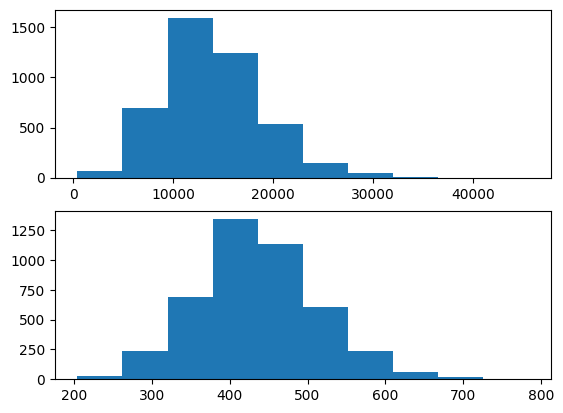

The statistics of article length: count     4346.000000
mean     13940.364473
std       5024.141557
min        398.000000
25%      10465.000000
50%      13413.000000
75%      16988.500000
max      45561.000000
dtype: float64
The statistics of summary (reference) length: count    4346.000000
mean      435.104234
std        76.153606
min       204.000000
25%       384.000000
50%       430.000000
75%       483.000000
max       784.000000
dtype: float64


In [38]:
file_path = "task1/train/eLife_train.jsonl"

articles, summaries = read_data(file_path)
print_statitiscs(articles, summaries, target='word_lengths')
print_statitiscs(articles, summaries, target='token_lengths')

Read data from :  task1/val/eLife_val.jsonl
The number of data:  241


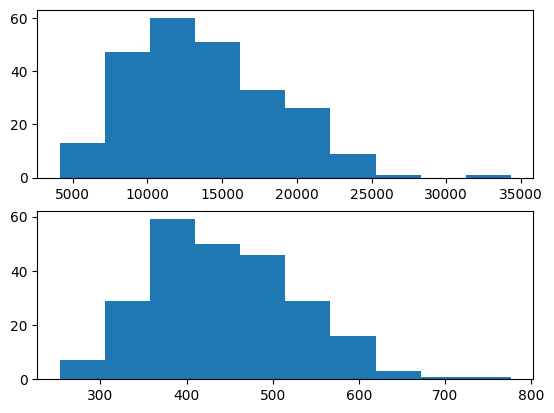

The statistics of article length: count      241.000000
mean     13703.278008
std       4744.033184
min       4136.000000
25%      10274.000000
50%      13204.000000
75%      17014.000000
max      34326.000000
dtype: float64
The statistics of summary (reference) length: count    241.000000
mean     443.344398
std       83.350825
min      253.000000
25%      383.000000
50%      438.000000
75%      496.000000
max      776.000000
dtype: float64


In [39]:
file_path = "task1/val/eLife_val.jsonl"

articles, summaries = read_data(file_path)
# print_statitiscs(articles, summaries, target='word_lengths')
print_statitiscs(articles, summaries, target='token_lengths')

Read data from :  task1/train/PLOS_train.jsonl
The number of data:  24773


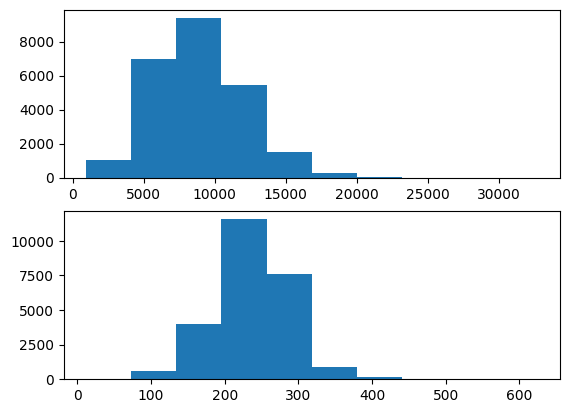

The statistics of article length: count    24773.000000
mean      8961.000040
std       3183.818937
min        952.000000
25%       6626.000000
50%       8752.000000
75%      10936.000000
max      32671.000000
dtype: float64
The statistics of summary (reference) length: count    24773.000000
mean       237.349170
std         49.984182
min         12.000000
25%        208.000000
50%        240.000000
75%        268.000000
max        624.000000
dtype: float64


In [40]:
file_path = "task1/train/PLOS_train.jsonl"

articles, summaries = read_data(file_path)
# print_statitiscs(articles, summaries, target='word_lengths')
print_statitiscs(articles, summaries, target='token_lengths')

Read data from :  task1/val/PLOS_val.jsonl
The number of data:  1376


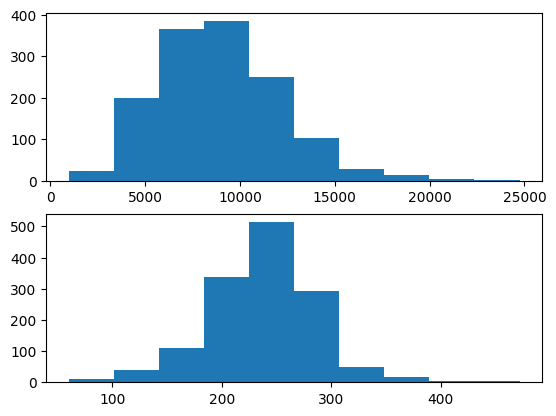

The statistics of article length: count     1376.000000
mean      8923.603924
std       3229.394099
min        974.000000
25%       6700.250000
50%       8713.500000
75%      10874.500000
max      24740.000000
dtype: float64
The statistics of summary (reference) length: count    1376.000000
mean      237.473837
std        49.265271
min        60.000000
25%       207.000000
50%       240.000000
75%       267.000000
max       472.000000
dtype: float64


In [42]:
# training: text compression via ROUGH
# Inference: train an extractor+summarization generation; truncate; hierarchical encoding; sparse attention

file_path = "task1/val/PLOS_val.jsonl"

articles, summaries = read_data(file_path)
# print_statitiscs(articles, summaries, target='word_lengths')
print_statitiscs(articles, summaries, target='token_lengths')

In [44]:
file_path = "task1/train/PLOS_train.jsonl"
articles, summaries = read_data(file_path)
with open("PLOS_train_article.txt", "w") as f:
    f.write(articles[0])

with open("PLOS_train_summary.txt", "w") as f:
    f.write(summaries[0])

Read data from :  task1/train/PLOS_train.jsonl
The number of data:  24773
